In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/surabaya-house-prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5262 non-null   float64
 1   num_bedroom      5300 non-null   int64  
 2   num_bathroom     5300 non-null   int64  
 3   garage_capacity  5300 non-null   int64  
 4   land_area        5300 non-null   int64  
 5   building_area    5300 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 248.6 KB


In [463]:
df.dropna(inplace=True)

In [464]:
df.drop(df[df["num_bedroom"] == 0].index, inplace=True)
df.drop(df[df["num_bathroom"] == 0].index, inplace=True)
df.drop(df[df["building_area"] <= 10].index, inplace=True)
df.drop(df[df["land_area"] <= 10].index, inplace=True)

In [465]:
df[df["land_area"] < df["building_area"]]

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
1,1.800000e+09,4,3,1,119,199
2,3.250000e+09,4,2,2,210,300
4,3.980000e+09,15,15,1,136,233
5,1.370000e+10,5,6,2,330,600
6,3.300000e+09,4,3,0,140,200
...,...,...,...,...,...,...
5293,2.600000e+09,3,3,2,110,165
5295,3.800000e+09,4,3,2,200,254
5297,6.800000e+09,4,4,2,220,350
5298,8.870000e+08,3,2,0,84,90


In [466]:
df.drop(df[df["land_area"] < df["building_area"]].index, inplace=True)

In [467]:
df.duplicated().sum()

np.int64(327)

In [468]:
df.drop_duplicates(inplace=True)

In [469]:
df.describe()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
count,1.668000e+03,1668.000000,1668.000000,1668.000000,1668.000000,1668.00000
mean,5.013411e+09,3.302758,2.244604,0.931655,278.568945,202.28717
std,9.705387e+09,1.677350,1.530377,1.235888,325.111352,223.28697
min,3.500000e+07,1.000000,1.000000,0.000000,24.000000,19.00000
25%,1.010000e+09,2.000000,1.000000,0.000000,100.000000,77.00000
50%,2.000000e+09,3.000000,2.000000,1.000000,180.000000,139.50000
75%,4.300000e+09,4.000000,3.000000,1.000000,332.000000,250.00000
max,1.100000e+11,24.000000,30.000000,16.000000,3852.000000,3490.00000


In [470]:
df.corr()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
price,1.000000,0.362070,0.410336,0.295910,0.742621,0.687397
num_bedroom,0.362070,1.000000,0.670805,0.216602,0.449234,0.495823
num_bathroom,0.410336,0.670805,1.000000,0.197241,0.474552,0.533915
garage_capacity,0.295910,0.216602,0.197241,1.000000,0.239016,0.242866
land_area,0.742621,0.449234,0.474552,0.239016,1.000000,0.885173
building_area,0.687397,0.495823,0.533915,0.242866,0.885173,1.000000


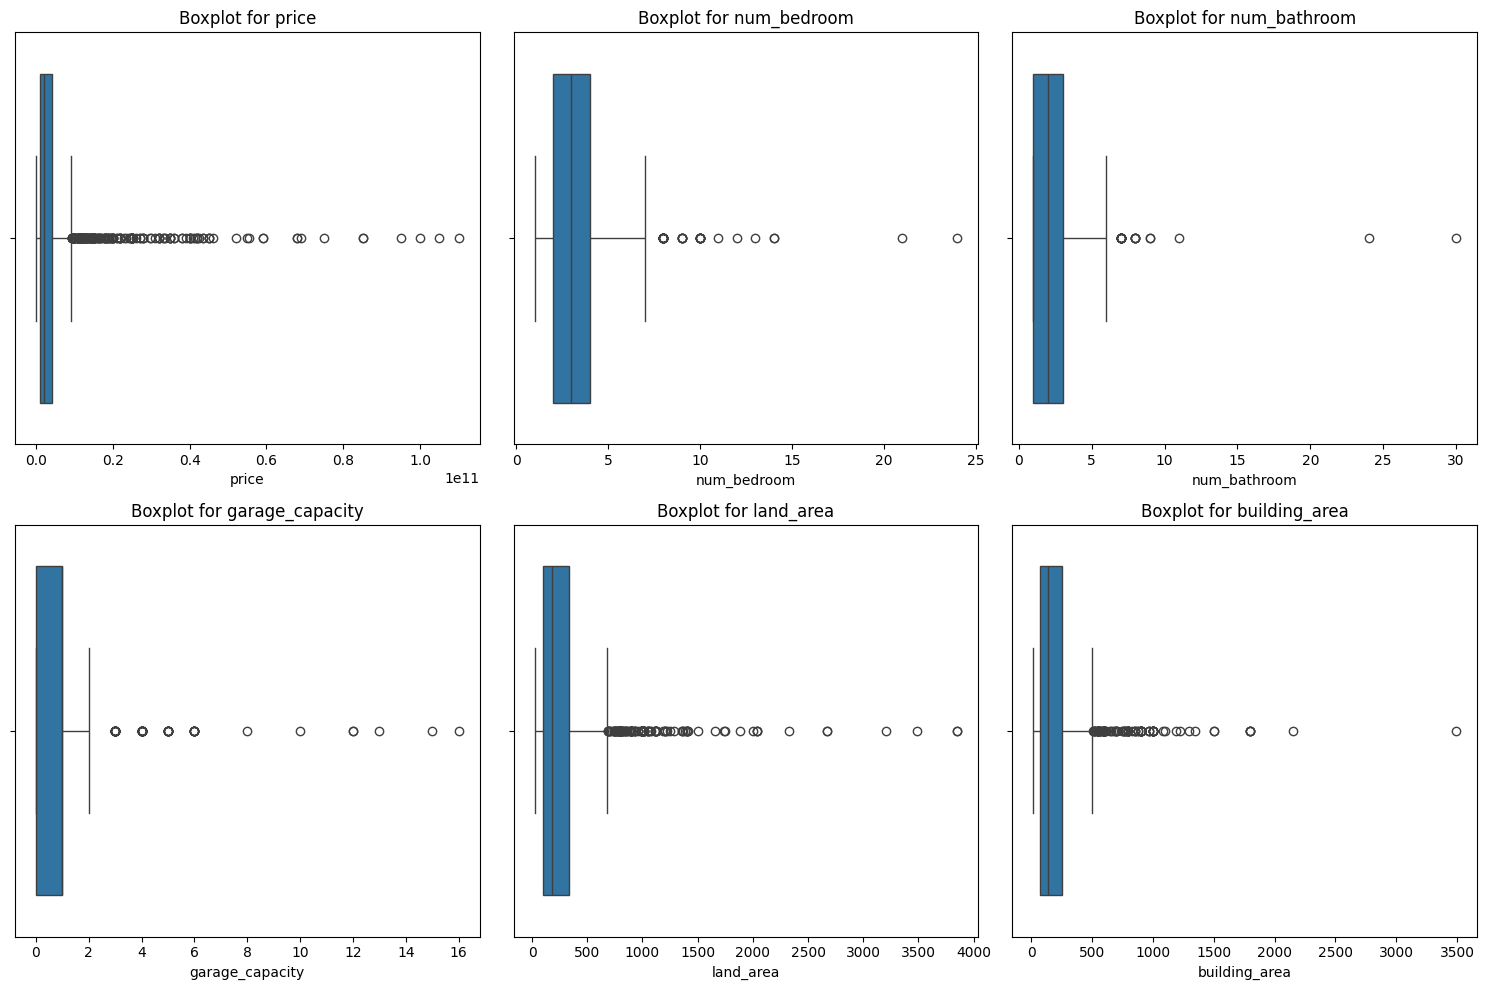

In [471]:
# Atur ukuran grid
rows, cols = 2, 3
fig, axes = plt.subplots(
    rows, cols, figsize=(15, 10)
)  # Ukuran figure dapat disesuaikan

# Flatten axes agar mudah diiterasi
axes = axes.flatten()

# Loop melalui kolom dataframe dan plot setiap boxplot
for i, col in enumerate(df.columns):
    if i < len(axes):  # Pastikan tidak melebihi jumlah subplot
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"Boxplot for {col}")

# Hilangkan subplot kosong jika kolom kurang dari grid
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])  # Hapus subplot yang tidak terpakai

# Atur layout agar tidak saling bertumpukan
plt.tight_layout()
plt.show()

In [472]:
from sklearn.preprocessing import StandardScaler

X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [473]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=0
)

In [474]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


def evaluation_metric(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return [f"{mae:.5f}", f"{mse:.5f}", f"{rmse:.5f}", f"{r2:.5f}"]

In [475]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "rf": RandomForestRegressor(random_state=0),
    "gb": GradientBoostingRegressor(random_state=0),
}


results = []

for model in models.values():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(evaluation_metric(y_test, y_pred))


evaluation_df = pd.DataFrame(
    data=results,
    columns=["MAE", "MSE", "RMSE", "R-squared"],
)

evaluation_df["Method"] = [name for name in models.keys()]
evaluation_df.set_index("Method", inplace=True)

evaluation_df.sort_values("R-squared", ascending=False)

,MAE,MSE,RMSE,R-squared
Method,,,,
rf,1743063887.50279,16223474834929389568.00000,4027837488.64442,0.81991
gb,1829571564.88534,17980304145322715136.00000,4240318873.07107,0.80041


In [476]:
df.to_csv("data/surabaya-house-prices-cleaned.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 5296
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1668 non-null   float64
 1   num_bedroom      1668 non-null   int64  
 2   num_bathroom     1668 non-null   int64  
 3   garage_capacity  1668 non-null   int64  
 4   land_area        1668 non-null   int64  
 5   building_area    1668 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 91.2 KB
